## Introduction to Numpy

NumPy is an incredibly powerful package in Python. 

* NumPy adds support for multi-dimensional arrays and mathematical functions that allow you to easily perform linear algebra calculations. 

This lecture will be a collection of linear algebra examples computed using NumPy. See [NumPy Documentation](https://numpy.org/doc/stable/user/quickstart.html#universal-functions) for more details. 

In [1]:
import numpy as aaa

aaa.exp(1)

2.718281828459045

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

### Basic Numpy arrays

The most basic way that we could make use of NumPy in finance is calculating the mean return of a portfolio. Say that we have a list containing the historical return of several stocks.

In [3]:
stock_list = [3.5, 5, 2, 8, 4.2]

We can make an array by calling a function on the list:

In [4]:
returns = np.array(stock_list)
print(returns, type(returns))

[3.5 5.  2.  8.  4.2] <class 'numpy.ndarray'>


You'll notice that the type of our array is 'ndarray', not just 'array'. This is because NumPy arrays can be created with multiple dimensions. If we pass np.array() a list of lists, it will create a 2-dimensional array. If we pass a list of lists of lists, it will create a 3-dimensional array, and so on and so forth.

In [5]:
A = np.array([[1, 2,3], [3, 4,2]])
print(A, type(A))

[[1 2 3]
 [3 4 2]] <class 'numpy.ndarray'>


We can access the dimensions of an array by looking at its ``shape`` member variable.



In [6]:
A.shape

(2, 3)

Arrays are indexed in much the same way as lists in Python. Elements of a list begin indexing from  $0$  and end at  $n−1$ , where  $n$  is the length of the array.

In [7]:
print(returns[0], returns[len(returns) -1])

3.5 4.2


We can take a slice of an array using a colon, just like in a list.



In [8]:
print(returns[1:3])

[5. 2.]


A slice of an array, like in a list, will select a group of elements in the array starting from the first element indicated and going up to (but not including) the last element indicated.

In the case of multidimensional arrays, many of the same conventions with slicing and indexing hold. We can access the first column of a 2-dimensional array like so:

In [9]:
print(A[:,0])

[1 3]


And the first row of a 2-dimensional array like so:



In [10]:
print(A[0,:])

[1 2 3]


Passing only one index to a 2-dimensional array will result in returning the row with the given index as well, providing us with another way to access individual rows.



In [11]:
print(A[0])
print(A[1])
print(A[1,1])

[1 2 3]
[3 4 2]
4


### Array functions 

Functions built into NumPy can be easily called on arrays. Most functions are applied to an array element-wise (as scalar multiplication is). For example, if we call ``log()`` on an array, the logarithm will be taken of each element.



In [12]:
print(np.log(returns))

[1.25276297 1.60943791 0.69314718 2.07944154 1.43508453]


Some functions return a single value. This is because they treat the array as a collection (similar to a list), performing the designated function. For example, the ``mean()`` function will do exactly what you expect, calculating the mean of an array. Or the ``max()`` function will return the maximum element of an array

In [13]:
print(np.mean(returns))
print(np.max(returns))

4.54
8.0


### Return to the returns

Now let's modify our returns array with scalar values. If we add a scalar value to an array it will be added to every element of the array. If we multiply an array by a scalar value it will be multiplied against every element of the array. If we do both, both will happen!

In [17]:
returns*2 + 5

array([12. , 15. ,  9. , 21. , 13.4])

NumPy also has functions specifically built to operate on arrays. Let's take the mean and standard deviation of this group of returns.



In [18]:
print("Mean: ", np.mean(returns), "Std Dev: ", np.std(returns))

Mean:  4.54 Std Dev:  1.9915822855207364


### Portfolio mean and variance from simulated returns 

Let's simulate a univers of stocks using NumPy's functions.

* Suppose we have $N$ assets and $T$ observations 

In [19]:
n_assets = 20
n_obs = 365 

We use the function ``randn`` in NumPy library. ``randn`` generates the random numbers following standard normal distribution ($N(0,1)$). 


In [20]:
return_vec = np.random.randn(n_obs, n_assets )

print(return_vec.shape)

(365, 20)


We can see our ``return_vec`` has the $365 \times 20$ observations. This means that there are 20 assets with 1 year observations. Considering this series as real data, we can calculate the expected returns and variances for each stock. This can be achieved by using the ``mean`` and ``var`` functions in NumPy

In [21]:
expected_return = np.mean(return_vec, axis = 0)
return_variance = np.var(return_vec, axis = 0)
return_std = np.std(return_vec, axis = 0)

print(expected_return.shape, return_variance.shape, return_std.shape)
print(expected_return, return_variance, return_std)

(20,) (20,) (20,)
[-0.05371172 -0.09341449 -0.02683452 -0.02181058 -0.08907421 -0.02129263
 -0.00421106 -0.0165936   0.00681102 -0.03502009  0.05567542  0.04882505
  0.01845656 -0.08829856 -0.00252299  0.04093036 -0.00698868  0.01482049
 -0.08829543  0.064644  ] [1.0177968  0.97779322 1.07186838 0.9888339  1.02993658 1.130096
 0.94368492 0.97406525 1.13153155 0.93414595 1.01457569 1.09198074
 0.91025971 0.97929751 1.03526051 0.97266849 0.92730003 1.02916177
 1.02736051 1.0056103 ] [1.00885916 0.98883427 1.03531077 0.99440128 1.01485791 1.06305974
 0.97143446 0.98694744 1.06373472 0.96651226 1.00726148 1.04497882
 0.95407532 0.98959462 1.01747752 0.98623957 0.96296419 1.01447611
 1.01358794 1.00280123]


Here, we use the ``mean`` and ``var`` with ``axis = 0``. The ``axis=0`` means that the statistics are calculated by each column. If you want to calcualte the mean as row levels, you must put ``axis = 1``. 

### Portfolio Return

So we have a universe of stocks. Let's put them together in a portfolio and calcualte its expected return and risk. 

We will start off by generating $N$ random weights for each asset in our portfolio.  The random weights are generated from uniform distribution. 

## Portfolio return

The portfolio return is defined as 

$$E(R_P) = w_1 E(R_1) + w_2 E(R_2) + \cdots + w_N E(R_N)$$

In [22]:
weights = np.random.uniform(0, 1, n_assets)
weights = weights/np.sum(weights)
print(weights)

[0.0578697  0.05993516 0.05615139 0.04302508 0.04238866 0.06635909
 0.04099377 0.01468545 0.05796674 0.04113058 0.06410328 0.05377529
 0.06873558 0.03779779 0.04010775 0.04132412 0.06846762 0.0672777
 0.01114405 0.06676123]


We have to rescale the weights so that they all add up to  $1$ . That is 

$$\sum_{i=1}^N w_i = 1$$


To calculate the mean return of the portfolio, we have to scale each asset's return by its designated weight. 

$$E[R_p] = \sum_{i=1}^N w_i E[R_i]$$

We can use NumPy's linear algebra methods. The function is ``dot()``. In our case, we have a vector of weights,  $w = [w_1,w_2, \cdots, w_N]'$  and a vector of returns,  $R = [E[R_1], E[R_2], \cdots, E[R_N]]'$ If we take the dot product of these two we will get:

$$w' \times R = w_1 E[R_1] + w_2 E[R_2] + \cdots + w_N E[R_N]$$

In [24]:
R = np.asmatrix(expected_return)
W = np.asmatrix(weights)

print(R.shape, W.shape)

portfolio_return = W * R.T
print(portfolio_return)

(1, 20) (1, 20)
[[-0.00823664]]




## Portfolio Variance 

The porffolio variance is defined as 

$$Var(R_P) = Var(w_1 R_1 + w_2 R_2 + \cdots + w_N R_N)$$

That is,

$$Var(R_P) = \sigma_P^2 = \sum_i w_i^2 \sigma_i^2 + \sum_i \sum_{i \neq j} w_i w_j  \sigma_i \sigma_j \rho_{i,j}$$

The portfolio variance can be represented as a matrix form. Suppose $\Omega$ as the variance-covariance matrix of return series. Then, the portfolio variance is 
$$ w' \Omega w$$
where $w$ is the $N \times 1$ vector of weights and $\Omega$ is a $N \times N$ covariance matrix. 

Using NumPy arrays, we can first compute the covariance matrix

In [25]:
cov_mat = np.cov(return_vec, rowvar = False)
print(cov_mat.shape)

C = np.asmatrix(cov_mat)
print(C)

(20, 20)
[[ 1.02059295e+00 -2.81096238e-02  4.21874664e-02 -8.51367033e-02
  -1.22492843e-01  1.21100926e-01 -1.01689914e-01 -4.63164865e-03
   2.73999564e-02 -2.54676976e-02  9.46721043e-02  1.10590408e-01
   1.60451888e-02  6.32168457e-02 -1.23839690e-01 -1.12607396e-02
  -7.02604674e-02  1.27423720e-02  3.74008584e-02 -3.54909445e-02]
 [-2.81096238e-02  9.80479462e-01 -2.40341158e-02 -1.12395992e-02
   5.81808100e-02  1.97529559e-02 -8.17034123e-03 -6.16858093e-02
   4.99142760e-02  1.65297358e-02 -4.31911782e-02  1.07974853e-01
  -6.53781491e-02  5.75480667e-02  9.28213569e-02  2.41342304e-02
   4.78188744e-02 -2.12670331e-02 -1.00852768e-01 -3.90418376e-02]
 [ 4.21874664e-02 -2.40341158e-02  1.07481308e+00  7.33958487e-02
  -7.73491569e-02  5.48304398e-02 -1.86727302e-02  1.00200837e-01
  -1.62568394e-02  3.92360794e-02  8.16472686e-02  1.02545685e-02
  -7.67835782e-02 -2.90133672e-02  2.43299375e-02 -4.02753169e-02
   1.47911778e-02  1.78882331e-02 -7.24960777e-02  5.90710959e-02

The ``cov_mat`` has the following form
$$
\left[\begin{matrix}
VAR[R_1] & COV[R_1, R_2] & \cdots & COV[R_1, R_N] \\
COV[R_2, R_1] & VAR[R_2] & \cdots & COV[R_2, R_N] \\
\vdots & \vdots & \ddots & \vdots \\
COV[R_N, R_1] & COV[R_N, R_2] & \cdots & VAR[R_N]
\end{matrix}\right]
$$

Then, the portfolio return and variance are

In [26]:
portfolio_variance = W*C*W.T
sigma = np.sqrt(portfolio_variance)

print(portfolio_return, sigma)

[[-0.00823664]] [[0.24020453]]


This section illustrates the use of NumPy partially by using some random number generations. Later, we will see the porfolio characteristics by using the real data with NumPy and Pandas libraries. 

### Beware of NaN values


Most of the time, all of these calculations will work without an issue. However, when working with real data we run the risk of having ``nan`` values in our arrays (Sometimes ``#N/A``). This is NumPy's way of saying that the data there is missing or doesn't exist. These ``nan`` values can lead to errors in mathematical calculations so it is important to be aware of whether your array contains ``nan`` values and to know how to drop them.



In [27]:
v = np.array([1, 2, np.nan, 4, 5])
print(v)

[ 1.  2. nan  4.  5.]


Let's see what happens when we try to take the mean of this array.

In [28]:
print(np.mean(v))

nan


Clearly, ``nan`` values can have a large impact on our calculations. Fortunately, we can check for nan values with the ``isnan()`` function.



In [29]:
np.isnan(v)

array([False, False,  True, False, False])

We use the ``isnan()`` function in create a boolean array, assigning a ``True`` value to everything that is not ``nan`` and a ``False`` to the ``nan``s and we use that to index the same array.

In [30]:
ix = ~np.isnan(v)
print(v[ix])
print(np.mean(v[ix]))

[1. 2. 4. 5.]
3.0


There are a few shortcuts to this process in the form of NumPy functions specifically built to handle them, such as ``nanmean()``.



In [31]:
print(np.nanmean(v))

3.0


## Introduction to Pandas

``pandas`` is a Python library that provides a collection of powerful data structures to better help you manage data. In this lecture, we will cover how to use the ``Series`` and ``DataFrame`` objects to handle data. These objects have a strong integration with ``NumPy``, allowing us to easily do the necessary statistical and mathematical calculations that we need for finance.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

With pandas, it is easy to store, visualize, and perform calculations on your data. With only a few lines of code we can modify our data and present it in an easily-understandable way. Here we simulate some returns in NumPy, put them into a pandas ``DataFrame``, and perform calculations to turn them into prices and plot them, all only using a few lines of code.

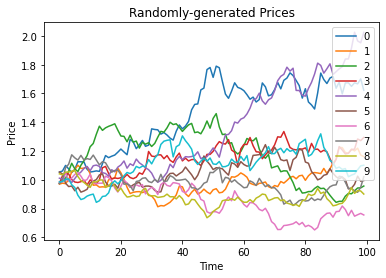

In [33]:
returns = pd.DataFrame(np.random.normal(1.0, 0.03, (100, 10)))
prices = returns.cumprod()
prices.plot()
plt.title('Randomly-generated Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc=0);

So let's have a look at how we actually build up to this point!



### pandas Data Structures

**``Series``**

A pandas ``Series`` is a 1-dimensional array with labels that can contain any data type. We primarily use them for handling time series data. Creating a ``Series`` is as easy as calling ``pandas.Series()`` on a Python list or NumPy array.

In [34]:
s = pd.Series([1, 2, np.nan, 4, 5])
print(s)

0    1.0
1    2.0
2    NaN
3    4.0
4    5.0
dtype: float64


Every ``Series`` has a name. We can give the series a name as a parameter or we can define it afterwards by directly accessing the name attribute. In this case, we have given our time series no name so the attribute should be empty.

In [35]:
print(s.name)

None


This name can be directly modified with no repercussions.



In [36]:
s.name = "Toy Series"
print(s.name)

Toy Series


We call the collected axis labels of a ``Series`` its index. An index can either passed to a ``Series`` as a parameter or added later, similarly to its name. In the absence of an index, a ``Series`` will simply contain an index composed of integers, starting at $0$ , as in the case of our "Toy Series".

In [37]:
print(s.index)

RangeIndex(start=0, stop=5, step=1)


pandas has a built-in function specifically for creating date indices, ``date_range()``. We use the function here to create a new index for ``s``.



In [38]:
new_index = pd.date_range("2016-01-01", periods=len(s), freq="D")
print(new_index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


An index must be exactly the same length as the ``Series`` itself. Each index must match one-to-one with each element of the ``Series``. Once this is satisfied, we can directly modify the ``Series`` index, as with the name, to use our new and more informative index (relatively speaking).

In [39]:
s.index = new_index
print(s.index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


The index of the ``Series`` is crucial for handling time series, which we will get into a little later.



### Accessing ``Series`` Elements

``Series`` are typically accessed using the ``iloc[]`` and ``loc[]`` methods. 

* ``iloc[]`` : access elements by integer index
* ``loc[]`` : access the index of the Series.

In [40]:
print(s)

2016-01-01    1.0
2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
2016-01-05    5.0
Freq: D, Name: Toy Series, dtype: float64


In [41]:
print("First element of the series: ", s.iloc[0])
print("Last element of the series: ", s.iloc[len(s)-1])

First element of the series:  1.0
Last element of the series:  5.0


We can slice a ``Series`` similarly to our favorite collections, Python lists and NumPy arrays. We use the colon operator to indicate the slice.



In [42]:
s.iloc[:2]

2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64

We can also access a series by using the values of its index. Since we indexed ``s`` with a collection of dates (``Timestamp`` objects) we can look at the value contained in ``s`` for a particular date.

In [43]:
s.loc['2016-01-02':'2016-01-04']

2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
Freq: D, Name: Toy Series, dtype: float64

### Indexing and Time Series 

Since we use ``Series`` for handling time series, it's worth covering a little bit of how we handle the time component. For our purposes we use pandas ``Timestamp`` objects. Let's pull a full time series from Yahoo Finance. 

In [49]:
#pip install pandas-datareader
!pip install yfinance
  

    
import yfinance as yf

symbol = 'IBM'
begdt = '2012-01-01'
enddt = '2018-12-31'

prices = yf.download(symbol, begdt, enddt)

prices = prices['Adj Close']

prices
 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
[*********************100%***********************]  1 of 1 completed


Date
2012-01-03 00:00:00-05:00    119.947609
2012-01-04 00:00:00-05:00    119.458298
2012-01-05 00:00:00-05:00    118.891701
2012-01-06 00:00:00-05:00    117.526764
2012-01-09 00:00:00-05:00    116.915176
                                ...    
2018-12-21 00:00:00-05:00     88.271111
2018-12-24 00:00:00-05:00     85.589706
2018-12-26 00:00:00-05:00     88.629158
2018-12-27 00:00:00-05:00     90.530785
2018-12-28 00:00:00-05:00     89.934029
Name: Adj Close, Length: 1759, dtype: float64

We can display the first few elements of our series by using the ``head()`` method and specifying the number of elements that we want. The analogous method for the last few elements is ``tail()``.

In [50]:
print("\n", type(prices))
prices.head()
#prices.shape


 <class 'pandas.core.series.Series'>


Date
2012-01-03 00:00:00-05:00    119.947609
2012-01-04 00:00:00-05:00    119.458298
2012-01-05 00:00:00-05:00    118.891701
2012-01-06 00:00:00-05:00    117.526764
2012-01-09 00:00:00-05:00    116.915176
Name: Adj Close, dtype: float64

We can specify a name for our time series

In [51]:
print('Old name: ', prices.name)
prices.name = symbol
print('New name: ', prices.name)

Old name:  Adj Close
New name:  IBM


Let's take a closer look at the ``DatetimeIndex`` of our ``prices`` time series.



In [52]:
print(prices.index)

DatetimeIndex(['2012-01-03 00:00:00-05:00', '2012-01-04 00:00:00-05:00',
               '2012-01-05 00:00:00-05:00', '2012-01-06 00:00:00-05:00',
               '2012-01-09 00:00:00-05:00', '2012-01-10 00:00:00-05:00',
               '2012-01-11 00:00:00-05:00', '2012-01-12 00:00:00-05:00',
               '2012-01-13 00:00:00-05:00', '2012-01-17 00:00:00-05:00',
               ...
               '2018-12-14 00:00:00-05:00', '2018-12-17 00:00:00-05:00',
               '2018-12-18 00:00:00-05:00', '2018-12-19 00:00:00-05:00',
               '2018-12-20 00:00:00-05:00', '2018-12-21 00:00:00-05:00',
               '2018-12-24 00:00:00-05:00', '2018-12-26 00:00:00-05:00',
               '2018-12-27 00:00:00-05:00', '2018-12-28 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=1759, freq=None)


### Time series analysis with pandas

Let's do some basic time series analysis on our original prices. Each pandas ``Series`` has a built-in plotting method.



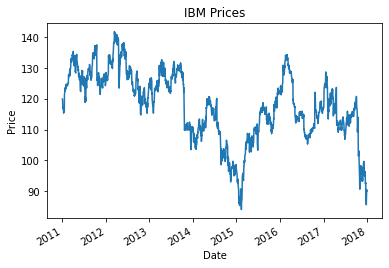

In [53]:
prices.plot();
plt.title(symbol + " Prices")
plt.ylabel("Price")
plt.xlabel("Date");

As well as some built-in descriptive statistics. We can either calculate these individually or using the ``describe()`` method.



In [54]:
print("Mean: ", prices.mean())
print("Standard deviation: ", prices.std())

Mean:  117.8673491963207
Standard deviation:  11.171178797957142


In [55]:
print("Summary Statistics")
print(prices.describe())

Summary Statistics
count    1759.000000
mean      117.867349
std        11.171179
min        84.041374
25%       110.650005
50%       117.913445
75%       126.665455
max       141.874619
Name: IBM, dtype: float64


Rather than looking at a time series itself, we may want to look at its first-order differences or percent change . Both of these are built-in methods.



In [56]:
add_returns = prices.diff()[1:]
mult_returns = prices.pct_change()[1:]

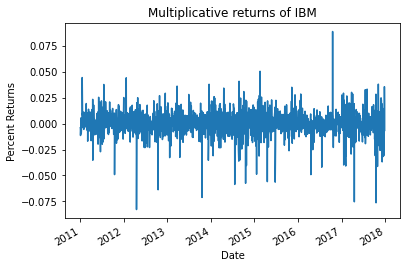

In [57]:
plt.title("Multiplicative returns of " + symbol)
plt.xlabel("Date")
plt.ylabel("Percent Returns")
mult_returns.plot();

pandas has convenient functions for calculating rolling means and standard deviations, as well!



In [58]:
rolling_mean = prices.rolling(window =90).mean()
rolling_mean.name = "30-day rolling mean"


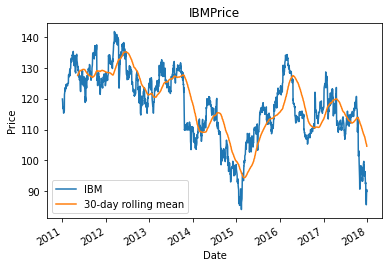

In [59]:
prices.plot()
rolling_mean.plot()
plt.title(symbol + "Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();